In [1]:
import numpy as np
import matplotlib.pyplot as plt

<b> LSH Hashing </b>

In [2]:
f1 = lambda x: x
f2 = lambda x: -.5*x
f3 = lambda x: 0.1*x

In [3]:
rng = 2
n_samples = 100
x = np.linspace(-rng, rng, num=n_samples)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)

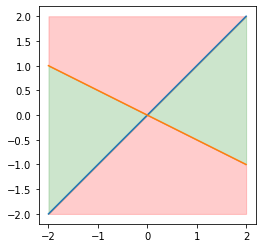

In [4]:
fig = plt.figure(1)
ax= fig.add_subplot(111)
"""for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)
"""
ax.plot(x, y1)
ax.plot(x, y2)
ax.fill_between(x, y1, y2, color='g', alpha=0.2)
x2 = -2*x
x2 = np.clip(x2, -rng, rng)
ax.fill_betweenx(y1, x, x2, color='r', alpha=0.2)
#axs.plot(x, y3)
ax.set_aspect('equal', 'box')
#axs.axis('equal')
#axs.set(xlim=(-rng,rng), ylim=(-rng,rng))
plt.show()

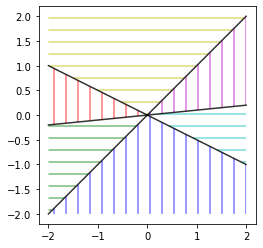

In [5]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
"""for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)
"""
a = 0.8
ax.plot(x, y1, c='k', alpha=0.8)
ax.plot(x, y2, c='k', alpha=0.8)
ax.plot(x, y3, c='k', alpha=0.8)
ax.fill_between(x[:n_samples//2], y1[:n_samples//2], y3[:n_samples//2], edgecolor='g', alpha=a, facecolor='none', hatch='-', linewidth=0.0)
ax.fill_between(x[n_samples//2:], y1[n_samples//2:], y3[n_samples//2:], edgecolor='m', alpha=a, facecolor='none', hatch='|', linewidth=0.0)
ax.fill_between(x[:n_samples//2], y3[:n_samples//2], y2[:n_samples//2], edgecolor='r', alpha=a, facecolor='none', hatch='|', linewidth=0.0)
ax.fill_between(x[n_samples//2:], y3[n_samples//2:], y2[n_samples//2:], edgecolor='c', alpha=a, facecolor='none', hatch='-', linewidth=0.0)
x2 = -2*x
x2 = np.clip(x2, -rng, rng)
ax.fill_betweenx(y1[:n_samples//2], x[:n_samples//2], x2[:n_samples//2], edgecolor='b', alpha=a, facecolor='none', hatch='|', linewidth=0.0)
ax.fill_betweenx(y1[n_samples//2:], x[n_samples//2:], x2[n_samples//2:], edgecolor='y', alpha=a, facecolor='none', hatch='-', linewidth=0.0)
ax.set_aspect('equal', 'box')
#axs.axis('equal')
#axs.set(xlim=(-rng,rng), ylim=(-rng,rng))
plt.show()

<b> Ratio test </b>

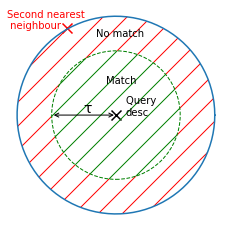

In [105]:
def plot_circ(ax, circumference, **kwargs):
    ax.plot(circumference * np.cos(x), circumference * np.sin(x), **kwargs)
x = np.linspace(0, 2*np.pi, 100)
tau = .65
fig = plt.figure()
ax = fig.add_subplot(111)
plot_circ(ax, 1)
ax.set_aspect('equal', 'box')
ax.scatter([0], [0], c='k', marker='x', s=100)
ax.annotate('Query \ndesc', (0,0), xytext=(0.1, 0), size=10)
ax.scatter([-.5], [np.cos(-.5)], c='r', marker='x', s=100)
ax.annotate('Second nearest\n neighbour', (-.5, np.cos(-.5)), xytext=(-1.1, np.cos(-.5)), size=10, c='r')
#ax.arrow(0, 0, -tau, 0)
ax.annotate("", xy=(-tau, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="<->"))
ax.annotate('τ', xy=(-tau/2, 0), xytext=(-tau/2, .025), size=14)
#plot_circ(ax, tau, c='r', linestyle='dashed')
ax.annotate('No match', xy=(-.2, (1-tau)/2+tau-.025))
ax.annotate('Match', xy=(-.1, tau/2))
n, radii = 50, [tau, 1]
xs = np.outer(radii, np.cos(x))
ys = np.outer(radii, np.sin(x))
xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]
ax.fill(np.ravel(xs), np.ravel(ys), facecolor='none', hatch='/', edgecolor='r', linewidth=0.0)
ax.add_artist(plt.Circle((0,0), tau, linestyle='dashed', edgecolor='g', facecolor='none', hatch='/'))
ax.axis('off')
plt.show()